In [43]:
import numpy as np
import matplotlib.pyplot as plt

import pywt.data
import sys
import cv2

if '..' not in sys.path:
    sys.path.append('..')

In proposed MDLE-IWT method, 
1. IWT is first appliedto the cover image to obtain four wavelet coefficient sub-bands asembedding regions.
1. The embedding sub-bands order in the algorithm is HL, LH, HH, and LL. 
1. Next, the embedding sub-band is divided into 3×3 non-overlapping blocks
1. MDLE scheme is applied to each block


In [44]:
from itertools import chain, repeat, cycle
from stego import codec
from stego.message import message_to_dec, dec_to_message, Base4MessageCoder, Base2MessageCoder
from stego.transform.dwt import Iwt, Dwt
from stego.image_coder import StegoCoder, RobustStegoCoder
import unireedsolomon as rs

## Encoding

In [45]:
from stego import correction_codes, image_coder

secret_message = "Hiding a message in a photo"
original = pywt.data.camera()
stego_coder = RobustStegoCoder(Dwt('haar', level=3), levels_to_encode=1, alpha=1)

In [46]:
stego_img = stego_coder.encode(original, secret_message)

Hiding a message in a photo   ä°; ue­$OAºávÏ°]ÄBNêhÊ@ÉJmày"ü²òÞuLïDÆÀB¦{åjsÍÂÉiëD­c´I/Ç?hÚþÿF¯ª_é4KkcÑËyt«


## Stego Image

np.allclose(stego_img, stego_from_file)=False


(512, 512)

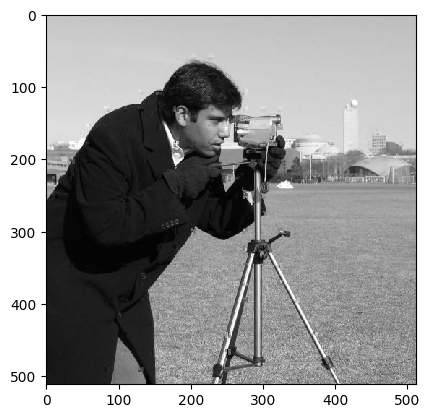

In [47]:
plt.imshow(stego_img, interpolation="nearest", cmap=plt.cm.gray)
cv2.imwrite("comp.jpg", stego_img, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
img = cv2.imread("comp.jpg")
stego_from_file, g, b = cv2.split(img)
print(f"{np.allclose(stego_img, stego_from_file)=}")
stego_img = stego_from_file
plt.imshow(stego_img, interpolation="nearest", cmap=plt.cm.gray)
stego_img.shape


## Extracting

In [48]:
message = stego_coder.decode(stego_img)
message

'Hiding a message in a photo   '